<h1> Calculate Area of geojson </h1>

In [1]:
from __future__ import division
import numpy as np
import json
import re
import gzip
import pandas as pd
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})
import seaborn as sns
import datetime
import csv
import urllib
import shapely
from matplotlib.patches import Polygon
from area import area

def save_dict_as_json(filename, mapping):
    '''Save dict as json object'''
    with open(filename, 'w') as outfile:
        json.dump(mapping, outfile, indent=4, sort_keys=True, separators=(',', ':'))

def load_dict_from_json(filepath):
    '''given file path to json mapping return a dict'''
    with open(filepath) as data_file:    
        return json.load(data_file)

Populating the interactive namespace from numpy and matplotlib


In [2]:
ET_woreda_geo = load_dict_from_json('/Users/attiladobi/Downloads/ethiopia-20170203.geojson')

<h3> format: <br> ET_woreda_geo['features'][i]['geometry']['coordinates'][[[]]] <br>
ET_woreda_geo['features'][i]['properties']['key'] </h3>

In [11]:
n = 100

print ET_woreda_geo['features'][n]['properties']['key'].split('______')
geo_obj = ET_woreda_geo['features'][n]['geometry']
area(geo_obj)/1e6

[u'benishangul-gumuz__benishangul-gumuz__bullen__']


3027.9459093597484

In [12]:
from shapely import geometry

In [17]:
geo_np = np.array(ET_woreda_geo['features'][n]['geometry']['coordinates'][0])
geo_rad = np.radians(geo_np)

In [18]:
geometry.polygon.Polygon(geo_rad).area*6370**2

3071.938451020064

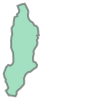

In [19]:
geometry.polygon.Polygon(geo_np)

<h1> loop and calculate total area km^2 </h1>

In [9]:
total_area = 0 
for entry in ET_woreda_geo['features']:
    name = entry['properties']['key']
    if len(name.split('______')) == 2:
        print name
        geo_obj = entry['geometry']
        poly_area = area(geo_obj)/1e6
        #geo_np = np.array(entry['geometry']['coordinates'][0])
        #geo_rad = np.radians(geo_np)
        #poly_area = geometry.polygon.Polygon(geo_rad).area*6370**2
        print poly_area
        #total_area += poly_area

somali______
312771.321922
gambella______
31448.3661421
afar______
95466.9058791
amhara______
156602.505051
dire dawa______
1060.02299051
oromiya______
325095.811953
benishangul-gumuz______
50553.0291341
harreri______
373.144506945
snnpr______
109951.353526
tigray______
52943.439071
addis ababa______
543.085945814


In [90]:
def calc_centroid(coordinates):
    ''' Pass in geo_obj['coordinates'][0] '''
    N = len(coordinates)
    lat_sum, lon_sum = 0, 0
    for latlon in coordinates:
        lat_sum = lat_sum + latlon[0]
        lon_sum = lon_sum + latlon[1]
    return [lat_sum / N, lon_sum / N]

<h1> loop through and calculate the centroids and areas,  then save</h1>

In [93]:
headers = ['WoredaName', 'ZoneName', 'RegionName', 'GeoKey', 'Area_km2', 'LatCenter', 'LonCenter']
#csv_data = [headers]
with open('Areas.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    for entry in ET_woreda_geo['features']:
        name = entry['properties']['key']
        region, zone, woreda = name.split('__')[:-1]
        geo_obj = entry['geometry']
        poly_area = area(geo_obj)/1e6
        latlons = geo_obj['coordinates'][0]
        # Sometimes the number of lists in the lists changes
        while len(np.shape(latlons)) > 2:
            latlons = latlons[0]
        centroid = calc_centroid(latlons)
        
        writer.writerow([woreda, zone, region, name, poly_area, centroid[0], centroid[1]])
    